In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import ydata_profiling as yd

C:\Users\User\AppData\Local\Temp\ipykernel_12740\4020313696.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('datasets\Alcohol_Sales.csv', index_col="DATE", parse_dates=True)

In [4]:
print(df.head())
print(df.info())
print(df.describe())

            S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB
None
       S4248SM144NCEN
count      325.000000
mean      7886.400000
std       2914.269061
min       3031.000000
25%       5231.000000
50%       7481.000000
75%       9977.000000
max      15504.000000


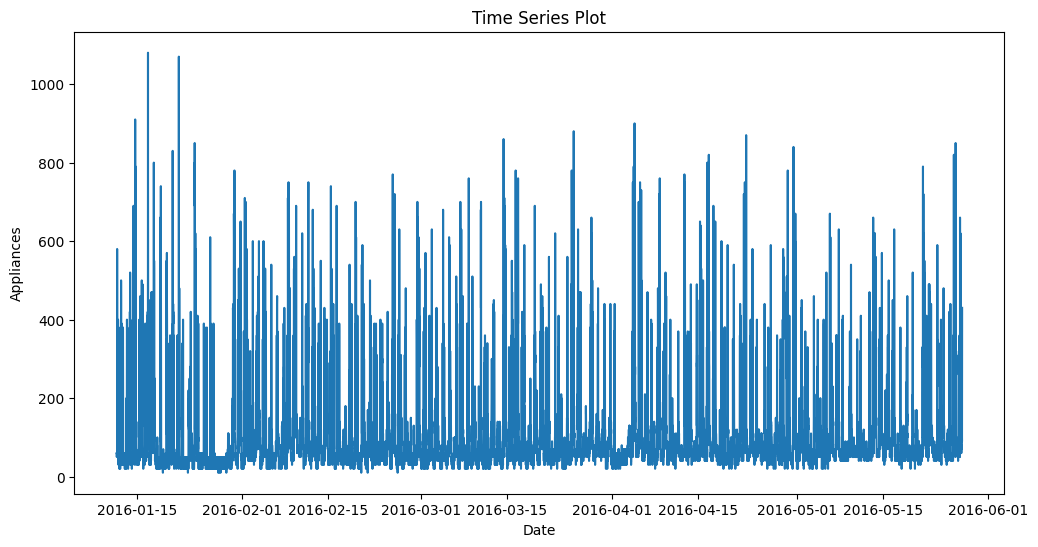

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[df.columns[0]])  # Specify x and y data explicitly
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel(df.columns[0])
plt.show()


In [5]:
DataProfile = yd.ProfileReport(df)
DataProfile.to_file("Profile.json")
DataProfile.to_file("Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

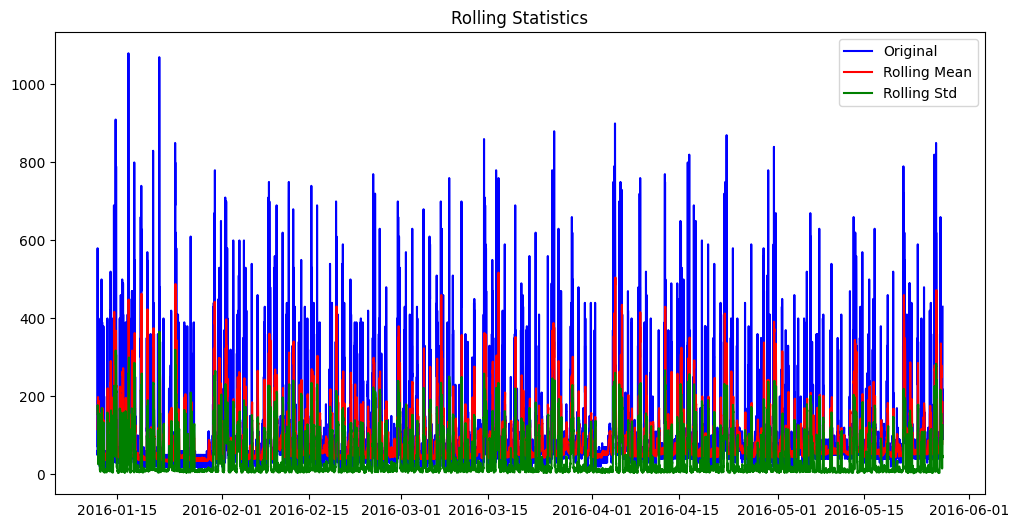

In [42]:
# Convert 'S4248SM144NCEN' column to numeric, handling errors
try:
    df[df.columns[0]] = pd.to_numeric(
        df[df.columns[0]].str.replace("?", ""), errors="coerce"
    )
except:
    pass
finally:
    rolling_mean = df[df.columns[0]].rolling(window=12).mean()
    rolling_std = df[df.columns[0]].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df[df.columns[0]], color="blue", label="Original")
plt.plot(rolling_mean, color="red", label="Rolling Mean")
plt.plot(rolling_std, color="green", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Statistics")
plt.show()

In [43]:
decomposition = seasonal_decompose(df, model='additive', period=12)  # Adjust period as needed

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [33]:
# plt.figure(figsize=(12, 8))
# decomposition = seasonal_decompose(df, model='additive', period=12)  # Adjust period as needed
# decomposition.plot()
# plt.show()

In [ ]:
df["month"] = df.index.month
fig, ax = plt.subplots(figsize=(10, 6))
# Use 'S4248SM144NCEN' instead of 'Value' for the y-axis
sns.boxplot(x="month", y=df.columns[0], data=df, ax=ax)
ax.set_title("Seasonal Boxplot (Monthly)")
plt.show()

In [ ]:
plt.figure(figsize=(18, 12))
# plt.subplot(121)
# Select the 'S4248SM144NCEN' column for ACF plot
plot_acf(df[df.columns[0]], lags=40)
# plt.subplot(122)
# Select the 'S4248SM144NCEN' column for PACF plot
plot_pacf(df[df.columns[0]], lags=40)
plt.show()

In [ ]:
def stationarity_test(timeseries):
    """
    Performs the Dickey-Fuller test to check for stationarity.

    Args:
      timeseries: The time series data.

    Returns:
      A tuple containing the test statistic, p-value, lags used,
      number of observations used, critical values, and the
      results of the test (whether the series is stationary or not).
    """
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value',
                                         '#Lags Used',
                                         'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dftest[1] <= 0.05:
        print("Conclusion: Series is likely stationary.")
    else:
        print("Conclusion: Series is now likely non-stationary.")
        # %%
        # Differencing to achieve stationarity
        # Change 'Value' to 'S4248SM144NCEN'
        df['Value_diff'] = df[df.columns[0]].diff().dropna()
        stationarity_test(df['Value_diff'].dropna())

        plt.figure(figsize=(12,6))
        plt.plot(df['Value_diff'], label='Differenced Data')
        plt.title('First Order Differencing')
        plt.legend()
        plt.show()

# Change 'Value' to 'S4248SM144NCEN' when calling the function
stationarity_test(df[df.columns[0]])